### Sumário

- FT, DTFT, DFT
- Sinais analisados
- FT (Fourier Transform)
- DTFT (Discrete Time Fourier Transform)
- DFT (Discrete Fourier Transform)
- DFT - Aumentando a resolução espectral com mais amostras do sinal
- DFT - "Aumentando" a resolução espectral com amostras artificiais
- DFT - Algo que não falamos

### FT, DTFT, DFT

Neste tópico falaremos um pouco sobre a definição de Transformada de Fourier de um sinal contínuo (FT), de um sinal discreto (Discrite Time Fourier Transform) e de sua versão discretizada (Discrete Fourier Transform). Nosso objecto é explicarar a diferença entre FT, DTFT e DFT e como estas se relacionam.

### Sinais analisados

Para isso vamos analisar o exemplo de dois sinais contínuos no tempo, o primeiro é uma combinação de duas senoides e o segundo um função rect.

$y_1(t) = sin(2\pi10t) + sin(2\pi5t)$

$y_2(t) = rect(\tau, t)$, onde $y_2 = 1$ se $|t| <= \tau$ e 0 caso contrário

Neste exemplo usamos $\tau = 0.5s$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sin(freq1, freq2, tfinal, Ts):
    t = np.arange(-tfinal/2, tfinal/2, Ts)
    y_sin = np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)
    return y_sin, t

In [3]:
def get_rect(tau, tfinal, Ts):
    t = np.arange(-tfinal/2, tfinal/2, Ts)
    rect = np.ones(len(t))
    rect[-(int(0.5*len(t))-int(0.5*tau/Ts)):] = 0
    rect[:(int(0.5*len(t))-int(0.5*tau/Ts))] = 0
    return rect, t

In [4]:
tfinal = 2
freq1 = 10
freq2 = 5
Fs = 1000
Ts = 1/Fs
tau = 0.5

y_sin, t = get_sin(freq1, freq2, tfinal, Ts)
rect, t = get_rect(tau, tfinal, Ts)

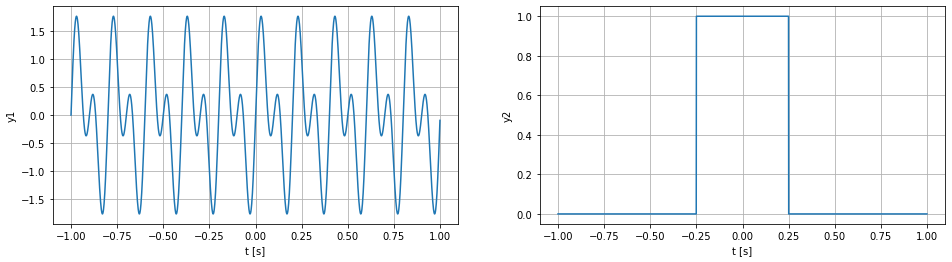

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(t, y_sin)
axs[0].set_ylabel("y1")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(t, rect)
axs[1].set_ylabel("y2")
axs[1].set_xlabel("t [s]")
axs[1].grid()


### FT (Fourier transform)

Lembremos aqui a equação da transformada de Fourier:

$F(f) = \int_{-\infty}^{\infty}f(t)e^{(-2\pi itf)}dt$

Como podemos ver a FT considera para o seu calculo um sinal em todo o seu domínio ($-\infty, \infty$), já nos gráficos acima estamos mostrando somente parte do sinal que vai de (-1, 1). Porém estamos assumindo nesta sessão que os sinais se estendem para todo faixa necessária para o calculo da FT.

Para o sinal $y_1$ assumimos que este é periódico e se repete indefinidamente, já para $y_2$ consideramos que o sinal é igual 0 fora do intervalor correspondendo a definição da função rect.

Dadas essas considerações, podemos  calcular a FT olhando um tabela de transformadas, sendo estas dada por:

$Y_1(f) = \delta(5) + \delta(10) +\delta(-5) +\delta(-10)$ 

e

$Y_2(f) = sinc(f)$

Vamos ver graficamente a forma das transformadas

*estamos desconsiderando constantes que podemos multiplicar essas funções.

In [6]:
n = len(y_sin)
if (n % 2 == 0):
  freq = np.arange(-n/2, n/2, 1)*Fs/n
else:
  freq = np.arange(-(n-1)/2, n/2, 1)*Fs/n

In [7]:
freq = np.arange(-Fs/2, Fs/2, 0.1)

In [8]:
rect_spec = np.abs(np.sinc(tau*freq))

In [9]:
y_sin_spec = np.zeros(len(freq))
idx = np.isclose(freq, freq1) | np.isclose(freq, -freq1) | np.isclose(freq, freq2) | np.isclose(freq, -freq2)
y_sin_spec[idx] = 1

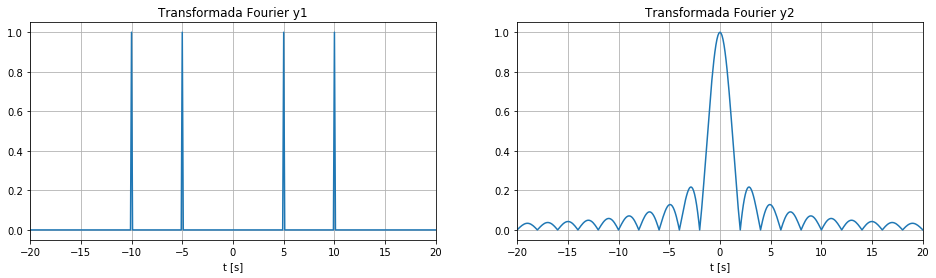

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(freq, y_sin_spec)
axs[0].set_title("Transformada Fourier y1")
axs[0].set_xlabel("t [s]")
axs[0].set_xlim([-20, 20])
axs[0].grid()
axs[1].plot(freq, rect_spec)
axs[1].set_xlim([-20, 20])
axs[1].set_title("Transformada Fourier y2")
axs[1].set_xlabel("t [s]")
axs[1].grid()


Pela definição da FT o espectro é dado por uma função contínua no domínio da frequência. Nos gráficos acima discretizamos os valores de frequência com uma resolução escolhida, mas pelo fato de calcularmos a transformada através de suas equações teóricas podemos refinar a discretização conforme a necessidade.

### DTFT (Discrete Time Fourier transform)

Para discutir a DTFT vamos relembrar sua equação considerando que o sinal foi amostrado em intervalos regulares com taxa de amostragem $T_s$.

O processo de amostragem no tempo pode ser modelado como a multiplicação do sinal $x(t)$ por um sequência de funções impulsos espaçados $T_s$. Onde $T_s$ é o tempo de amostragem.

$x_{sampled}(t) = x(t)\sum_{k=-\infty}^{k=\infty}\delta(t-kT_s)$, k inteiro

Portanto o espectro do sinal amostrado é dado pela convolução do espetro original de $x(t)$ com a sequência de impulsos espaçados $f_s = \frac{1}{T_s}$. Isso tem o efeito de replicar o espectro de $x(t)$ a cada $f_s$ unidades de frequência, esse espectro replicado pode ser descrito pela equação:

$X_{sampled}(f) = \sum_{k=-\infty}^{k=\infty}X(f-kf_s)$

Assim como a FT, a DTFT é uma função contínua no domínio da frequência, além disso, ela também é uma função periódica já que o espectro se repete a passos de $f_s$, por isso é comum olharmos para somente um período da DTFT.

Como discutido no tópico Teorema_de_Nyquist_e_Aliasing, a conversão do espectro de volta para o domínio do tempo sem perda de informação só é possivel se a frequência de amostragem for maior que 2 vezes a maior frequência do sinal amostrado.

Em nosso exemplo, para o sinal $y_1$ basta que $f_s$ seja maior que 20 Hz. Já o sinal $y_2$ não é limitado em frequência pois a função sinc nunca chega de fato a zero, porém há um decaimento na energia com o aumento da frequência. Assim, na prática, podemos ignorar o efeito de aliasing se usarmos uma frequências de amostragem alta o suficiente.



### DFT (Discrete Fourier transform)

Para discutirmos a DFT primeiro vemos ver como ela é calculada: 

$X_{k} = \sum_{x=-\frac{N-1}{2}}^{\frac{N-1}{2}}x_ne^{\frac{-i2\pi}{N}kn}$

Vemos que a DFT trabalha com sinais discretos e finitos e que a transformada calculada também é discreta e finita.

Os valores de frequência para a qual DFT é calculada são dadas por:

$f_k = \frac{nFs}{N}$, onde n vai de [-$\frac{N-1}{2}$, $\frac{N-1}{2}$] caso N impar e [$-\frac{N}{2}$, $\frac{N}{2}-1$] caso N par.

Além de ser discreta tanto no domínio do tempo como no domínio da frequência, a DFT só coincide com a FT se o sinal amostrado for períodico e este sinal for amostrado por um múltiplo de seu período. Isto é, a sequência de amostras discretas for periódica.

### DFT - "Aumentando" a resolução espectral com amostras artificiais

Vamos ver o que acontece com a DFT quando variamos o número de pontos N, primero adicionando amostras artificialmente através da adição de zeros ao sinal e depois aumentando o tempo pelo qual o sinal é amostrado.

In [11]:
tfinal_1 = 1
tfinal_2 = 2
freq1 = 10
freq2 = 5
Fs = 100
Ts = 1/Fs
tau = 0.5

y_sin_1, t_1 = get_sin(freq1, freq2, tfinal_1, Ts)
y_sin_2, t_2 = get_sin(freq1, freq2, tfinal_2, Ts)

In [12]:
N1 = len(y_sin_1)
y_sin_spec_1 = np.abs(np.fft.fft(y_sin_1, n=N1))
freq_1 = np.fft.fftfreq(N1)*Fs

In [13]:
Nt2 = len(y_sin_2)
y_sin_spec_t2 = np.abs(np.fft.fft(y_sin_2, n=Nt2))
freq_t2 = np.fft.fftfreq(Nt2)*Fs

In [14]:
N = 2*len(y_sin_1)
y_sin_spec_2 = np.abs(np.fft.fft(y_sin_1, n=N))
freq_2 = np.fft.fftfreq(N)*Fs

In [15]:
N = 5*len(y_sin_1)
y_sin_spec_3 = np.abs(np.fft.fft(y_sin_1, n=N))
freq_3 = np.fft.fftfreq(N)*Fs

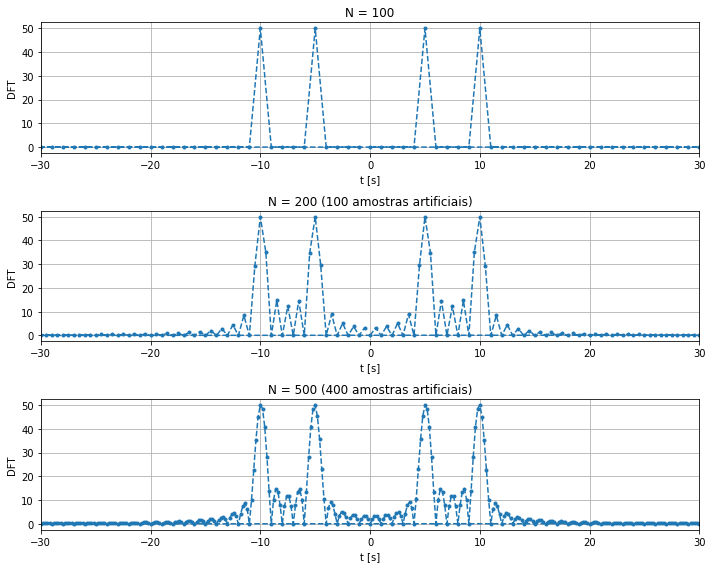

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(freq_1, y_sin_spec_1, '.--')
axs[0].set_title("N = 100")
axs[0].set_ylabel("DFT")
axs[0].set_xlabel("t [s]")
axs[0].set_xlim([-30, 30])
axs[0].grid()

axs[1].plot(freq_2, y_sin_spec_2, '.--')
axs[1].set_title("N = 200 (100 amostras artificiais)")
axs[1].set_ylabel("DFT")
axs[1].set_xlabel("t [s]")
axs[1].set_xlim([-30, 30])
axs[1].grid()

axs[2].plot(freq_3, y_sin_spec_3, '.--')
axs[2].set_title("N = 500 (400 amostras artificiais)")
axs[2].set_ylabel("DFT")
axs[2].set_xlabel("t [s]")
axs[2].set_xlim([-30, 30])
axs[2].grid()

plt.tight_layout()


Analisando a DFT do sinal $y_1$ vemos que quando N é igual ao tamanho do sinal (N=100) a DFT coincide com a FT do sinal sendo formada por 4 impulsos nas frequências esperadas, como dito anteriormente isto ocorre pois o sinal original é periodico e foi amostrado por exatamente um múltiplo de seu periodo, assim a DFT coincide com a FT.

Outro ponto importante a ser notado é que agora o espectro é calculado em somente N frequências limitando nossa resolução em frequência.

Em seguida temos a DFT calculada adicionando-se amostras artificiais, isto é feito passando um valor maior que N ao parâmetro $n$ da função np.fft.fft e equivale a adicionar zeros ao sinal amostrado até que tenha o tamanho do $n$ usado.

Ao fazer isso vemos que o espectro do sinal $y_1$ não mais corresponde as funções impulsos esperadas e temos o surgimento de lóbulos laterais próximos as frequências do sinal. Esses lóbulos aparecem pois agora não temos mais uma sequência de amostras periódicas devidos aos zeros inseridos. 

Esses lóbulos em torno das frequências do sinal na verdade prejudicam a localizão das frequências na DFT. Ou seja, ao aumentarmos o valor de N artificialmente não estamos melhoramos de fato nossa resolução espectral, somente distribuimos a energia presente em mais pontos próximos a elas.

Porém essa técnica pode ser aplicada para melhorar o aspécto de visualização da DFT em alguns casos.

Por fim, caso queiramos de fato aumentar a resolução do espectro precisamos ao invés de aumentar nosso sinal artificalmente amostra-lo por mais tempo.

Vejamos o que acontece quando dobramos o tempo de amostragem.

### DFT - Aumentando a resolução espectral com mais amostras do sinal

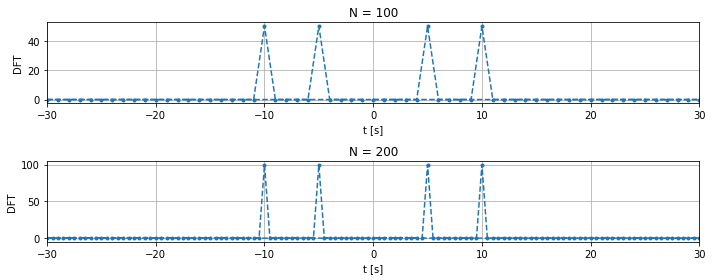

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 4))
axs[0].plot(freq_1, y_sin_spec_1, '.--')
axs[0].set_title("N = 100")
axs[0].set_ylabel("DFT")
axs[0].set_xlabel("t [s]")
axs[0].set_xlim([-30, 30])
axs[0].grid()

axs[1].plot(freq_t2, y_sin_spec_t2, '.--')
axs[1].set_title("N = 200")
axs[1].set_ylabel("DFT")
axs[1].set_xlabel("t [s]")
axs[1].set_xlim([-30, 30])
axs[1].grid()

plt.tight_layout()


Vemos agora que a DFT está com as frequências nos lugares corretos, novamente devido ao fato da sequencia amostrada ser. Mas diferente do caso anteior, agora de fato a resolução de frequência é maior, já que a mesma faixa de frequência é amostrada com o dobro de pontos.

### DFT - Algo que não falamos

Apesar deste tópicos mostrar os o aparecimento dos lóbulos laterais quando amostras artificiais são inceridas ainda não abordamos aqui o efeito de usarmos apenas uma amostra limitada do sinal e nem como a DFC é afetada quando a amostragem do sinal períodico não corresponde a um período. Discutiremos esses aspectros em outro tópico onde falaremos sobre janelamento.

### Conclusão

Neste tópico discutimos:
- A definição de FT e algumas de suas propriedades
- A definição de DTFT e algumas de suas propriedades
- A definição de DFT e algumas de suas propriedades
- Como a adição de amostras artificiais aumenta artificialmente a resolução espectral
- Como podemos de fato melhorar a resolução espectral ao aumentar o tempo de amostragem do sinal